In [24]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
# Customize column names
col_names = ['ID','Diagnosis','radius','texture','perimeter','area','smoothness','compactness',
             'concavity','concave_pts','symmetry','fractal_dim','radius_std','texture_std',
             'perimeter_std','area_std', 'smoothness_std','compactness_std','concavity_std',
             'concave_pts_std','symmetry_std','fractal_dim_std','radius_ext','texture_ext',
             'perimeter_ext','area_ext','smoothness_ext','compactness_ext','concavity_ext',
             'concave_pts_ext','symmetry_ext','fractal_dim_ext']
# Import data
df = pd.read_table('wdbc.data',sep=',',names = col_names)
df.head()

ID Diagnosis  radius  texture  perimeter    area  smoothness  \
0    842302         M   17.99    10.38     122.80  1001.0     0.11840   
1    842517         M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301         M   11.42    20.38      77.58   386.1     0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0     0.10030   

   compactness  concavity  concave_pts  symmetry  fractal_dim  radius_std  \
0      0.27760     0.3001      0.14710    0.2419      0.07871      1.0950   
1      0.07864     0.0869      0.07017    0.1812      0.05667      0.5435   
2      0.15990     0.1974      0.12790    0.2069      0.05999      0.7456   
3      0.28390     0.2414      0.10520    0.2597      0.09744      0.4956   
4      0.13280     0.1980      0.10430    0.1809      0.05883      0.7572   

   texture_std  perimeter_std  area_std  smoothness_std  compactness_std  \
0       0.9053          8.589    153.40        0.006399          0.04904   
1       0.7339          3.398     74.08        0.005225          0.01308   
2       0.7869          4.585     94.03        0.006150          0.04006   
3       1.1560          3.445     27.23        0.009110          0.07458   
4       0.7813          5.438     94.44        0.011490          0.02461   

   concavity_std  concave_pts_std  symmetry_std  fractal_dim_std  radius_ext  \
0        0.05373          0.01587       0.03003         0.006193       25.38   
1        0.01860          0.01340       0.01389         0.003532       24.99   
2        0.03832          0.02058       0.02250         0.004571       23.57   
3        0.05661          0.01867       0.05963         0.009208       14.91   
4        0.05688          0.01885       0.01756         0.005115       22.54   

   texture_ext  perimeter_ext  area_ext  smoothness_ext  compactness_ext  \
0        17.33         184.60    2019.0          0.1622           0.6656   
1        23.41         158.80    1956.0          0.1238           0.1866   
2        25.53         152.50    1709.0          0.1444           0.4245   
3        26.50          98.87     567.7          0.2098           0.8663   
4        16.67         152.20    1575.0          0.1374           0.2050   

   concavity_ext  concave_pts_ext  symmetry_ext  fractal_dim_ext  
0         0.7119           0.2654        0.4601          0.11890  
1         0.2416           0.1860        0.2750          0.08902  
2         0.4504           0.2430        0.3613          0.08758  
3         0.6869           0.2575        0.6638          0.17300  
4         0.4000           0.1625        0.2364          0.07678

In [3]:
# Import scaled data
scaled_df = pd.read_table('scaled_data',sep=',',index_col = 0)
scaled_df.head()

ID    radius   texture  perimeter      area  smoothness  compactness  \
0 -0.236405  1.097064 -2.073335   1.269934  0.984375    1.568466     3.283515   
1 -0.236403  1.829821 -0.353632   1.685955  1.908708   -0.826962    -0.487072   
2  0.431741  1.579888  0.456187   1.566503  1.558884    0.942210     1.052926   
3  0.432121 -0.768909  0.253732  -0.592687 -0.764464    3.283553     3.402909   
4  0.432201  1.750297 -1.151816   1.776573  1.826229    0.280372     0.539340   

   concavity  concave_pts  symmetry  fractal_dim  radius_std  texture_std  \
0   2.652874     2.532475  2.217515     2.255747    2.489734    -0.565265   
1  -0.023846     0.548144  0.001392    -0.868652    0.499255    -0.876244   
2   1.363478     2.037231  0.939685    -0.398008    1.228676    -0.780083   
3   1.915897     1.451707  2.867383     4.910919    0.326373    -0.110409   
4   1.371011     1.428493 -0.009560    -0.562450    1.270543    -0.790244   

   perimeter_std  area_std  smoothness_std  compactness_std  concavity_std  \
0       2.833031  2.487578       -0.214002         1.316862       0.724026   
1       0.263327  0.742402       -0.605351        -0.692926      -0.440780   
2       0.850928  1.181336       -0.297005         0.814974       0.213076   
3       0.286593 -0.288378        0.689702         2.744280       0.819518   
4       1.273189  1.190357        1.483067        -0.048520       0.828471   

   concave_pts_std  symmetry_std  fractal_dim_std  radius_ext  texture_ext  \
0         0.660820      1.148757         0.907083    1.886690    -1.359293   
1         0.260162     -0.805450        -0.099444    1.805927    -0.369203   
2         1.424827      0.237036         0.293559    1.511870    -0.023974   
3         1.115007      4.732680         2.047511   -0.281464     0.133984   
4         1.144205     -0.361092         0.499328    1.298575    -1.466770   

   perimeter_ext  area_ext  smoothness_ext  compactness_ext  concavity_ext  \
0       2.303601  2.001237        1.307686         2.616665       2.109526   
1       1.535126  1.890489       -0.375612        -0.430444      -0.146749   
2       1.347475  1.456285        0.527407         1.082932       0.854974   
3      -0.249939 -0.550021        3.394275         3.893397       1.989588   
4       1.338539  1.220724        0.220556        -0.313395       0.613179   

   concave_pts_ext  symmetry_ext  fractal_dim_ext  
0         2.296076      2.750622         1.937015  
1         1.087084     -0.243890         0.281190  
2         1.955000      1.152255         0.201391  
3         2.175786      6.046041         4.935010  
4         0.729259     -0.868353        -0.397100

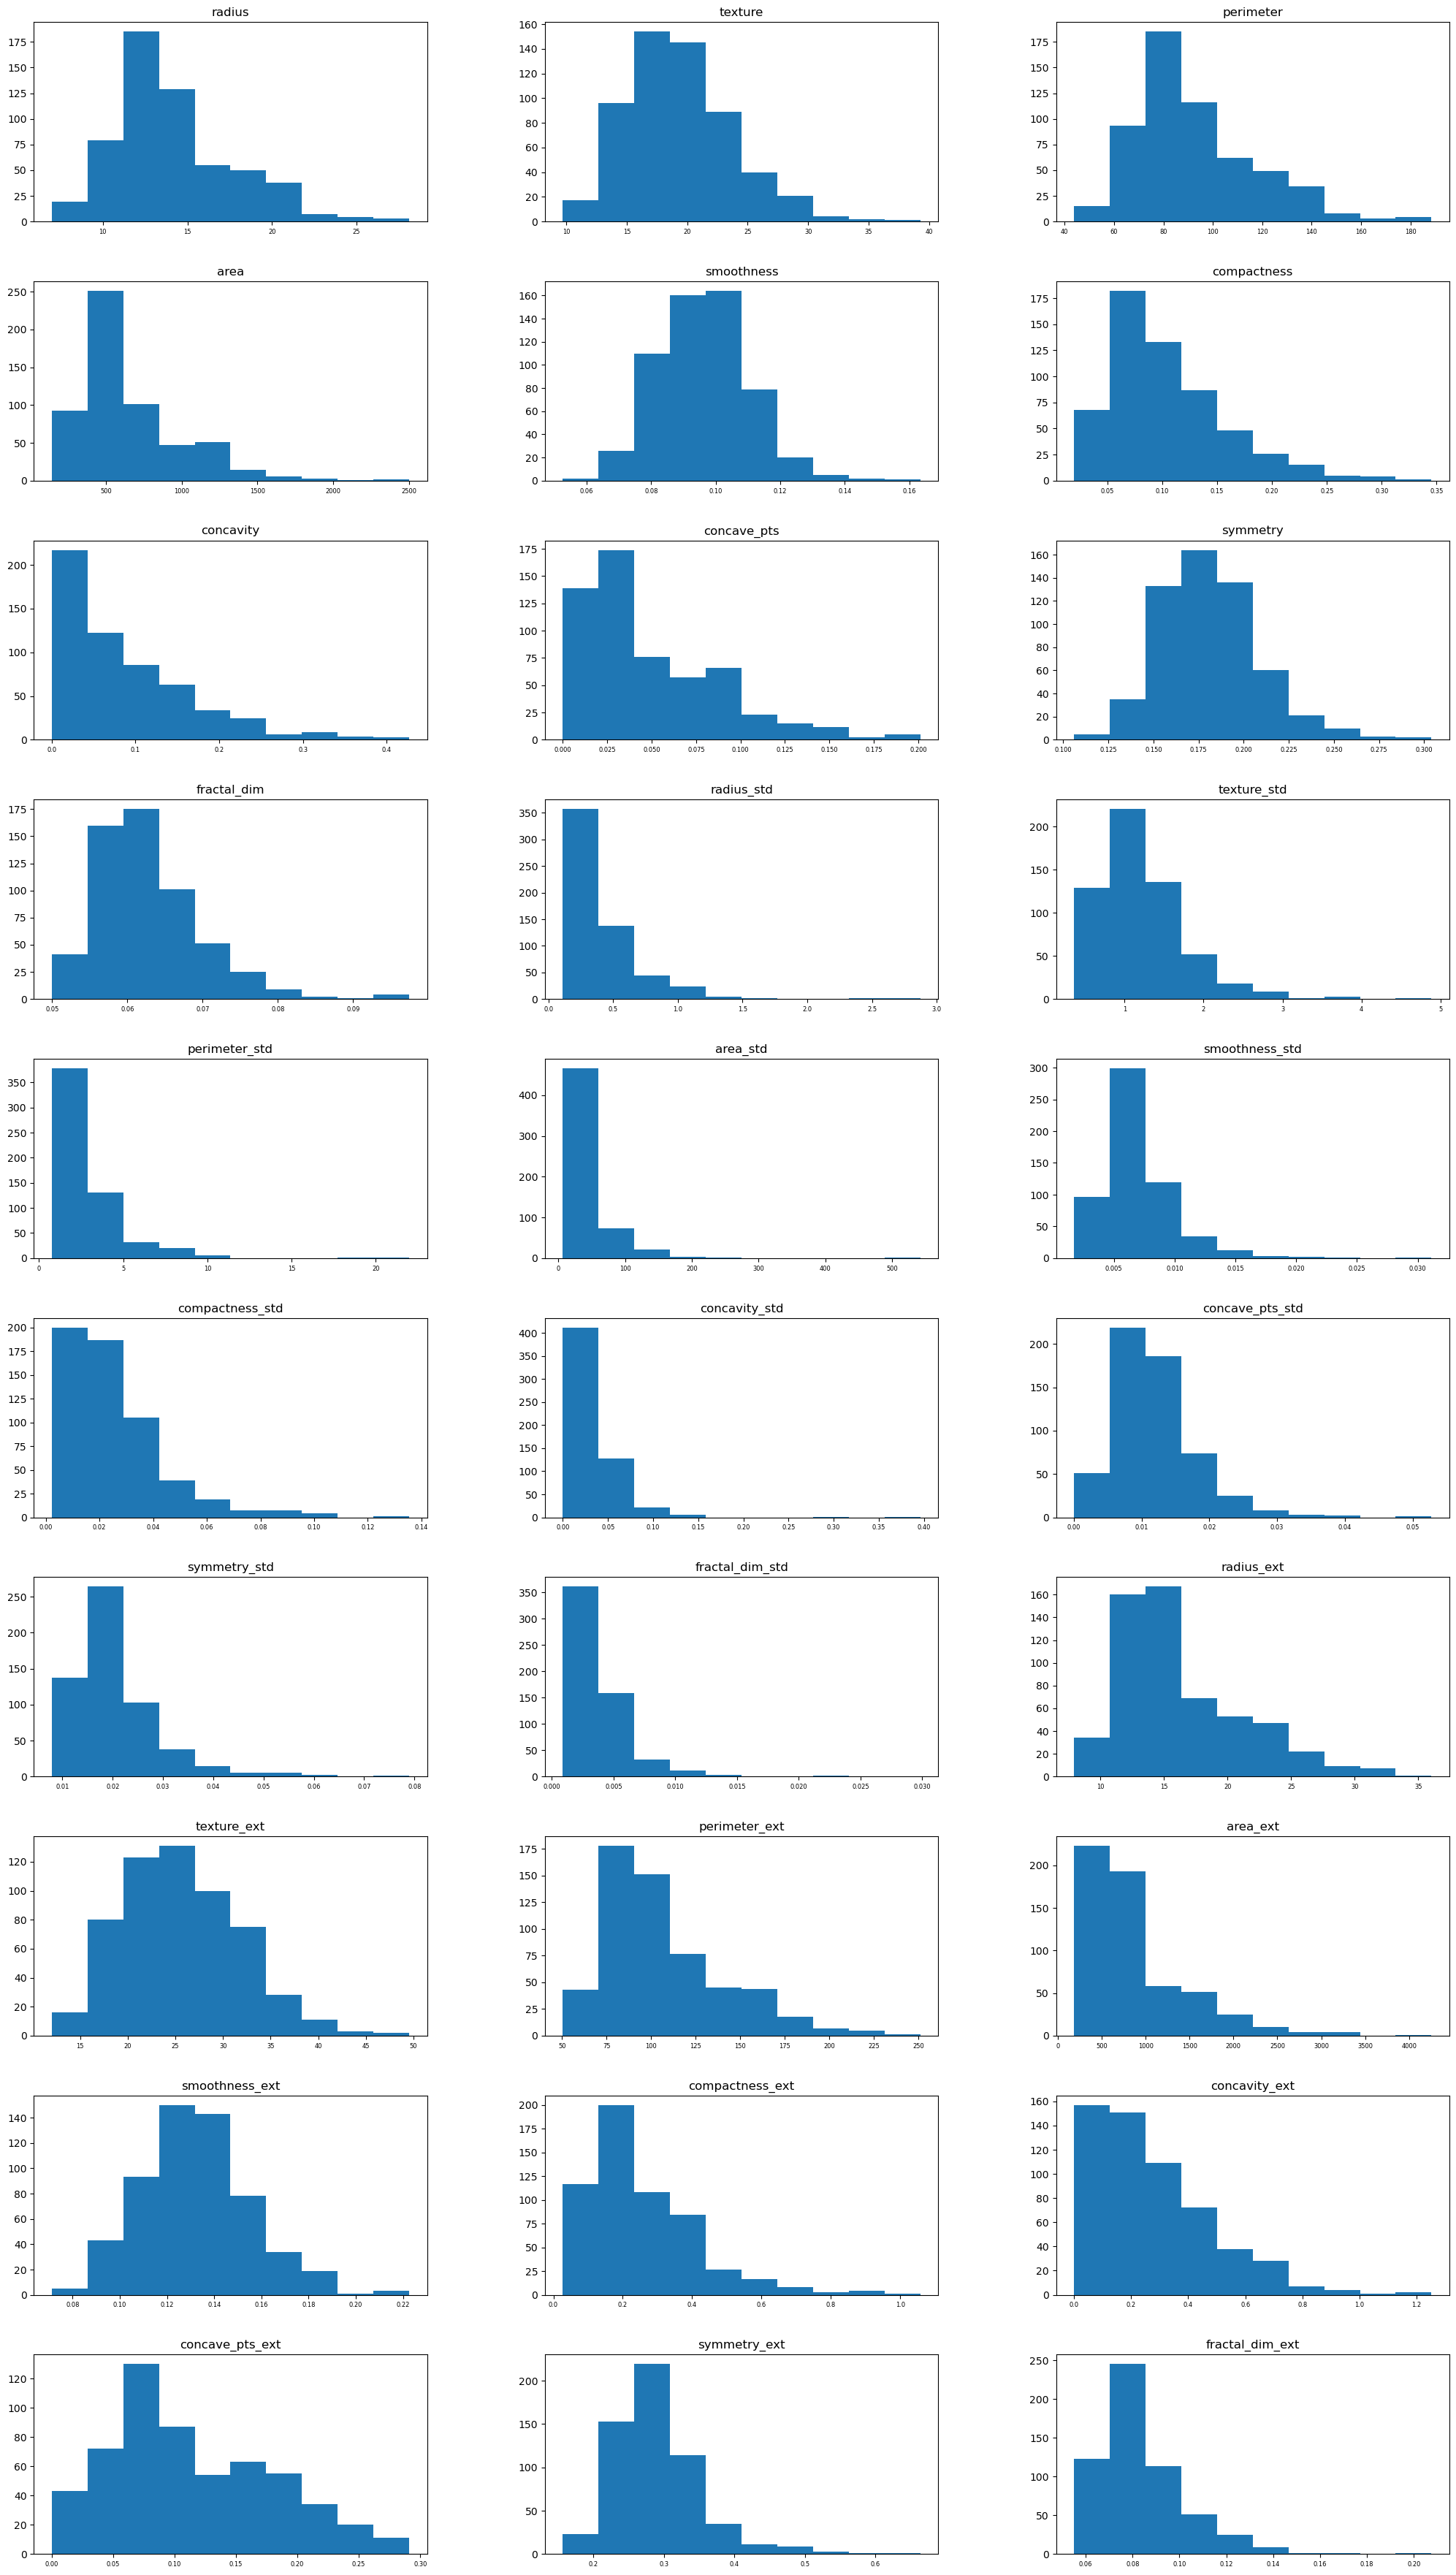

In [4]:
# Examine distributions for each feature
num_fts = [i for i in col_names if i != 'ID' and i != 'Diagnosis']
df.hist(column = num_fts, grid = False, xlabelsize = 6, layout = (10,3), figsize = (25,45));

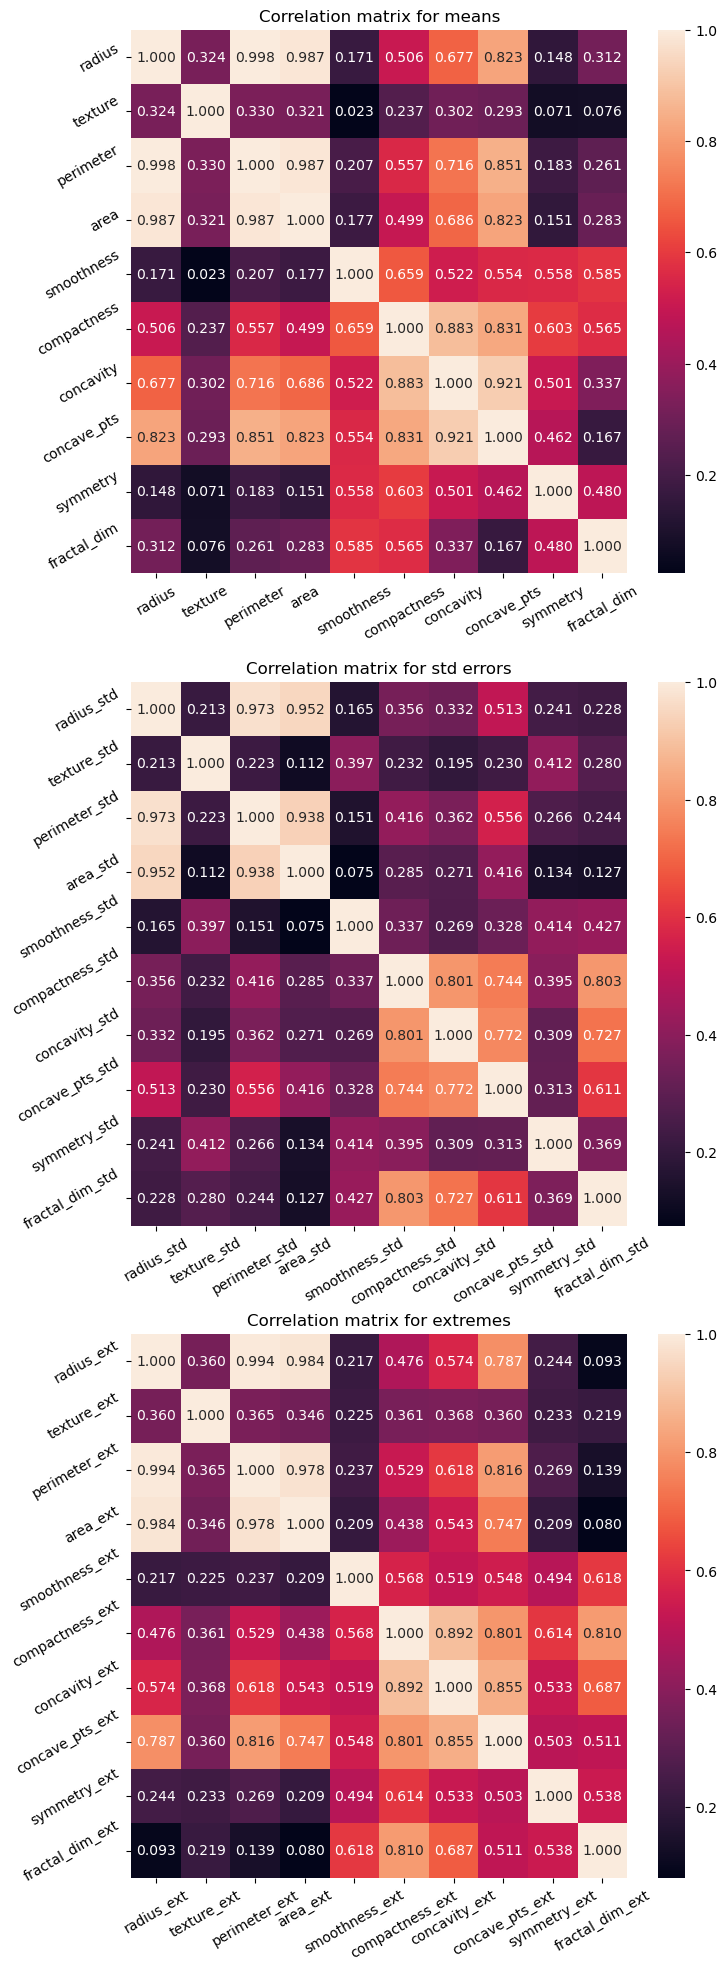

In [7]:
# Correlation matrix - separate matrix for means, standard errors, and extremes
means = ['radius','texture','perimeter','area','smoothness','compactness','concavity',
         'concave_pts','symmetry','fractal_dim']
stds = ['radius_std','texture_std','perimeter_std','area_std', 'smoothness_std',
        'compactness_std','concavity_std','concave_pts_std','symmetry_std','fractal_dim_std']
exts = ['radius_ext','texture_ext','perimeter_ext','area_ext','smoothness_ext',
        'compactness_ext','concavity_ext','concave_pts_ext','symmetry_ext','fractal_dim_ext']

fig,ax = plt.subplots(3, 1, figsize=(8,24))
fig.subplots_adjust(wspace = 8)

sns.heatmap(ax = ax[0], data = df[means].corr(numeric_only = True).abs(), fmt='.3f', annot = True)
ax[0].tick_params(labelrotation = 30)
sns.heatmap(ax = ax[1], data = df[stds].corr(numeric_only = True), fmt='.3f', annot = True)
ax[1].tick_params(labelrotation = 30)
sns.heatmap(ax = ax[2], data = df[exts].corr(numeric_only = True), fmt='.3f', annot = True)
ax[2].tick_params(labelrotation = 30)

ax[0].set_title('Correlation matrix for means')
ax[1].set_title('Correlation matrix for std errors')
ax[2].set_title('Correlation matrix for extremes')

plt.show();

Strongest correlations between radius/perimeter/area which makes sense geometrically. Area especially seems unnecessary since the original research actually says that area was just a function of a 2D area measurement + half perimeter.

Also strong correlations between compactness/concavity/concave points (and correlated with the three geometric features). Original research indicates that compactness is a combination (perimeter^2 / area) so can consider dropping a feature here.

Will be testing different feature subsets later on in modelling.

In [8]:
# Creating a test subset (removing most highly correlated features) to view correlation
# between other features, then creating a new correlation matrix
subset01 = ['Diagnosis','texture','smoothness','symmetry','fractal_dim','texture_std',
           'smoothness_std','symmetry_std','fractal_dim_std','texture_ext','smoothness_ext',
           'symmetry_ext','fractal_dim_ext']
df_bool = df.loc[:, subset01]
df_bool['Diagnosis'] = df_bool['Diagnosis'].map({'M': 1, 'B': 0})

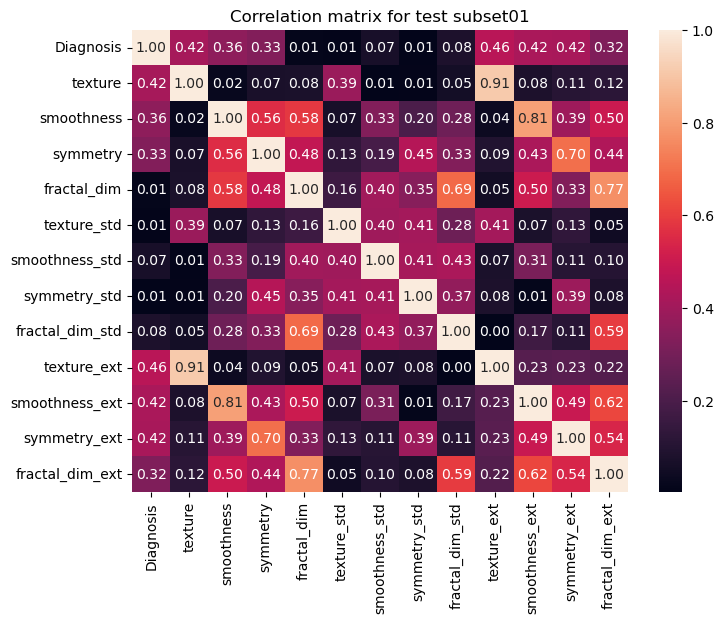

In [9]:
fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(df_bool.corr(numeric_only = True).abs(), fmt='.2f', annot = True)
plt.title('Correlation matrix for test subset01')
plt.show();

Helps narrow down features for another possible subset - texture and texture_ext are highly correlated (the definition of the 'texture' measurement in the original research was vague). Same for smoothness, symmetry, and fractal dimension. Fractal dimension is also pretty highly correlated between mean and std error.

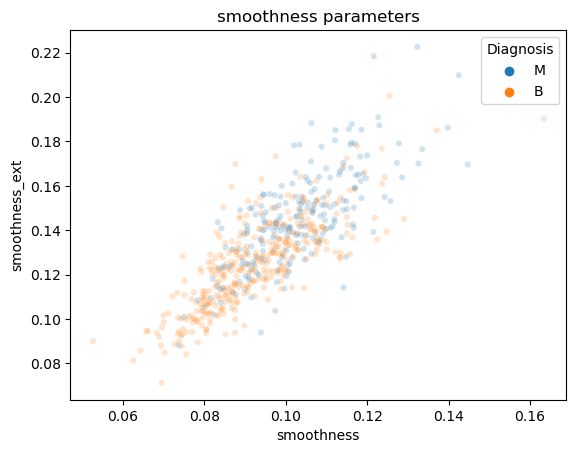

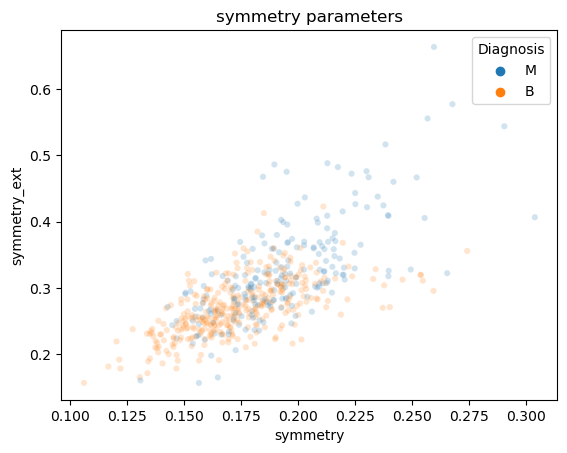

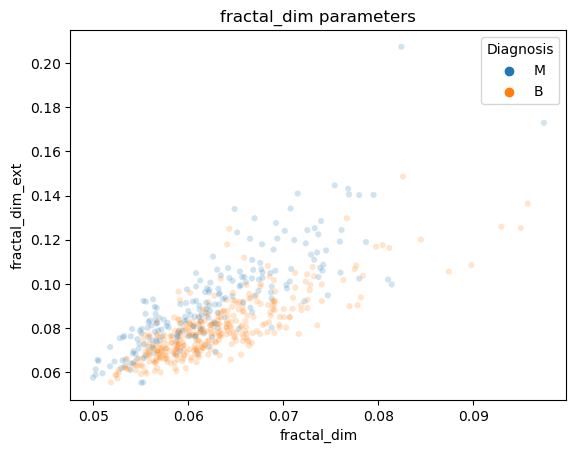

In [10]:
# Plotting mean and std error correlations for 3 features
par_corrs = ['smoothness','symmetry','fractal_dim']

for f in par_corrs:
    ext = f + '_ext'
    sns.scatterplot(x = f, y = ext, alpha = .2, data = df, hue = 'Diagnosis', s = 20).set_title(f + ' parameters')
    plt.show()

Potential pattern with fractal dimension - negative (B) cases correlated with lower worst fractal dimension (as compared to means). The original research explains that fractal dimension is approximated using the slope (on a log scale) of coastline approximations of the perimeter, in decreasing precision (and therefore decreasing perimeter). Knowing this, it's surprising that fractal dimension and perimeter aren't more closely correlated. But it's plausible that contour irregularity might be fairly independent of actual perimeter measurements - for instance, nuclei with more extreme irregularity (concavity?) would shrink faster in a sequence of coastline approximations than nuclei with equal perimeter but less extreme irregularity (so probably larger overall).

In [14]:
# Some collinearity is present - using a PCA to potentially determine another subset
pca = df.drop('ID', axis = 1).reset_index(drop = True).set_index('Diagnosis')
pca_idx = pca.index
pca_scal = pd.DataFrame(scale(pca), columns = pca.columns)
pca_scal.head()

radius   texture  perimeter      area  smoothness  compactness  \
0  1.097064 -2.073335   1.269934  0.984375    1.568466     3.283515   
1  1.829821 -0.353632   1.685955  1.908708   -0.826962    -0.487072   
2  1.579888  0.456187   1.566503  1.558884    0.942210     1.052926   
3 -0.768909  0.253732  -0.592687 -0.764464    3.283553     3.402909   
4  1.750297 -1.151816   1.776573  1.826229    0.280372     0.539340   

   concavity  concave_pts  symmetry  fractal_dim  radius_std  texture_std  \
0   2.652874     2.532475  2.217515     2.255747    2.489734    -0.565265   
1  -0.023846     0.548144  0.001392    -0.868652    0.499255    -0.876244   
2   1.363478     2.037231  0.939685    -0.398008    1.228676    -0.780083   
3   1.915897     1.451707  2.867383     4.910919    0.326373    -0.110409   
4   1.371011     1.428493 -0.009560    -0.562450    1.270543    -0.790244   

   perimeter_std  area_std  smoothness_std  compactness_std  concavity_std  \
0       2.833031  2.487578       -0.214002         1.316862       0.724026   
1       0.263327  0.742402       -0.605351        -0.692926      -0.440780   
2       0.850928  1.181336       -0.297005         0.814974       0.213076   
3       0.286593 -0.288378        0.689702         2.744280       0.819518   
4       1.273189  1.190357        1.483067        -0.048520       0.828471   

   concave_pts_std  symmetry_std  fractal_dim_std  radius_ext  texture_ext  \
0         0.660820      1.148757         0.907083    1.886690    -1.359293   
1         0.260162     -0.805450        -0.099444    1.805927    -0.369203   
2         1.424827      0.237036         0.293559    1.511870    -0.023974   
3         1.115007      4.732680         2.047511   -0.281464     0.133984   
4         1.144205     -0.361092         0.499328    1.298575    -1.466770   

   perimeter_ext  area_ext  smoothness_ext  compactness_ext  concavity_ext  \
0       2.303601  2.001237        1.307686         2.616665       2.109526   
1       1.535126  1.890489       -0.375612        -0.430444      -0.146749   
2       1.347475  1.456285        0.527407         1.082932       0.854974   
3      -0.249939 -0.550021        3.394275         3.893397       1.989588   
4       1.338539  1.220724        0.220556        -0.313395       0.613179   

   concave_pts_ext  symmetry_ext  fractal_dim_ext  
0         2.296076      2.750622         1.937015  
1         1.087084     -0.243890         0.281190  
2         1.955000      1.152255         0.201391  
3         2.175786      6.046041         4.935010  
4         0.729259     -0.868353        -0.397100

In [15]:
# Check scaling
pca_scal.std(ddof=0)

radius             1.0
texture            1.0
perimeter          1.0
area               1.0
smoothness         1.0
compactness        1.0
concavity          1.0
concave_pts        1.0
symmetry           1.0
fractal_dim        1.0
radius_std         1.0
texture_std        1.0
perimeter_std      1.0
area_std           1.0
smoothness_std     1.0
compactness_std    1.0
concavity_std      1.0
concave_pts_std    1.0
symmetry_std       1.0
fractal_dim_std    1.0
radius_ext         1.0
texture_ext        1.0
perimeter_ext      1.0
area_ext           1.0
smoothness_ext     1.0
compactness_ext    1.0
concavity_ext      1.0
concave_pts_ext    1.0
symmetry_ext       1.0
fractal_dim_ext    1.0
dtype: float64

In [16]:
# Fit PCA
pca_fit = PCA().fit(pca_scal)

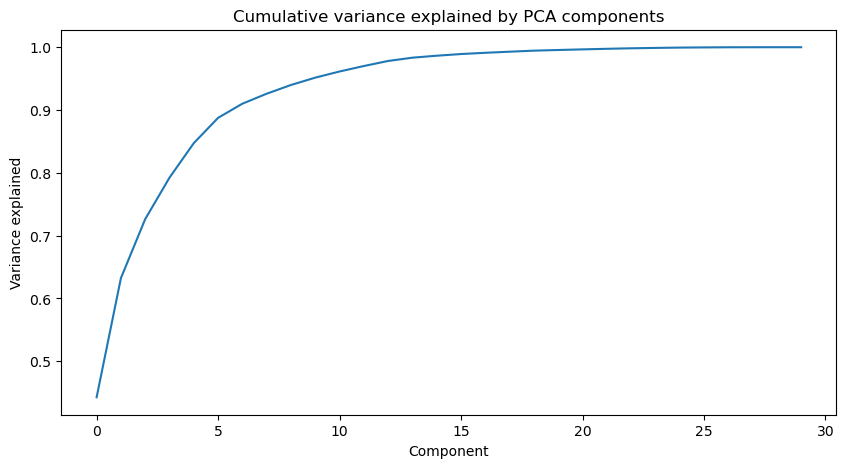

In [17]:
# Plot components vs. variance explained
plt.subplots(figsize = (10,5))

plt.plot(pca_fit.explained_variance_ratio_.cumsum())
plt.xlabel('Component')
plt.ylabel('Variance explained')
plt.title('Cumulative variance explained by PCA components')
plt.show();

In [18]:
# Display actual percentages
variance = []

for comp in range(0,20):
    variance.append(str(comp) + ": " +
                    str(round(pca_fit.explained_variance_ratio_.cumsum()[comp], 4)))
display(variance)

['0: 0.4427',
 '1: 0.6324',
 '2: 0.7264',
 '3: 0.7924',
 '4: 0.8473',
 '5: 0.8876',
 '6: 0.9101',
 '7: 0.926',
 '8: 0.9399',
 '9: 0.9516',
 '10: 0.9614',
 '11: 0.9701',
 '12: 0.9781',
 '13: 0.9834',
 '14: 0.9865',
 '15: 0.9892',
 '16: 0.9911',
 '17: 0.9929',
 '18: 0.9945',
 '19: 0.9956']

It looks like the first 13 components explain over 98% of the variance in the data.

In [19]:
# Extracting features from components - not precise, but useful as a possible subset for use
# in modelling later
comp_fts = pd.DataFrame(pca_fit.components_, columns = pca.columns).T

ft_counts = []

for i in range(0,14):
    fts = comp_fts.iloc[:, i].round(decimals = 3).sort_values(ascending=False)
    display(fts[0:2])
    ft_counts.append(fts[0:1].index)

concave_pts    0.261
concavity      0.258
Name: 0, dtype: float64

fractal_dim        0.367
fractal_dim_std    0.280
Name: 1, dtype: float64

texture_std       0.375
smoothness_std    0.309
Name: 2, dtype: float64

smoothness    0.159
area_std      0.108
Name: 3, dtype: float64

concavity_std      0.354
compactness_std    0.280
Name: 4, dtype: float64

symmetry_ext    0.499
symmetry_std    0.490
Name: 5, dtype: float64

fractal_dim_ext    0.375
area_std           0.347
Name: 6, dtype: float64

smoothness_std    0.573
symmetry_ext      0.228
Name: 7, dtype: float64

concavity_std      0.358
concave_pts_std    0.273
Name: 8, dtype: float64

symmetry           0.572
fractal_dim_std    0.368
Name: 9, dtype: float64

concavity_std    0.350
texture_std      0.345
Name: 10, dtype: float64

symmetry_std    0.321
smoothness      0.317
Name: 11, dtype: float64

concavity      0.387
compactness    0.229
Name: 12, dtype: float64

compactness_std    0.492
smoothness         0.445
Name: 13, dtype: float64

In [20]:
# Using Counter to find the most common features in the top 13 PCA components
top_fts = []

for i in range(0,14):
    top_fts.append(ft_counts[i][0])

Counter(top_fts).most_common

<bound method Counter.most_common of Counter({'concavity_std': 3, 'concave_pts': 1, 'fractal_dim': 1, 'texture_std': 1, 'smoothness': 1, 'symmetry_ext': 1, 'fractal_dim_ext': 1, 'smoothness_std': 1, 'symmetry': 1, 'symmetry_std': 1, 'concavity': 1, 'compactness_std': 1})>

Concavity std seems to be a strong explainer of overall variance in the data. PCA suggests concavity, concave points, fractal dim, fractal dim std, texture std, smoothness std are important.

Interesting that standard error appears to be a good predictor? It could be useful for the model to know standard errors but seems like actual measurements should be better predictors. We will see how this subset does in modeling.

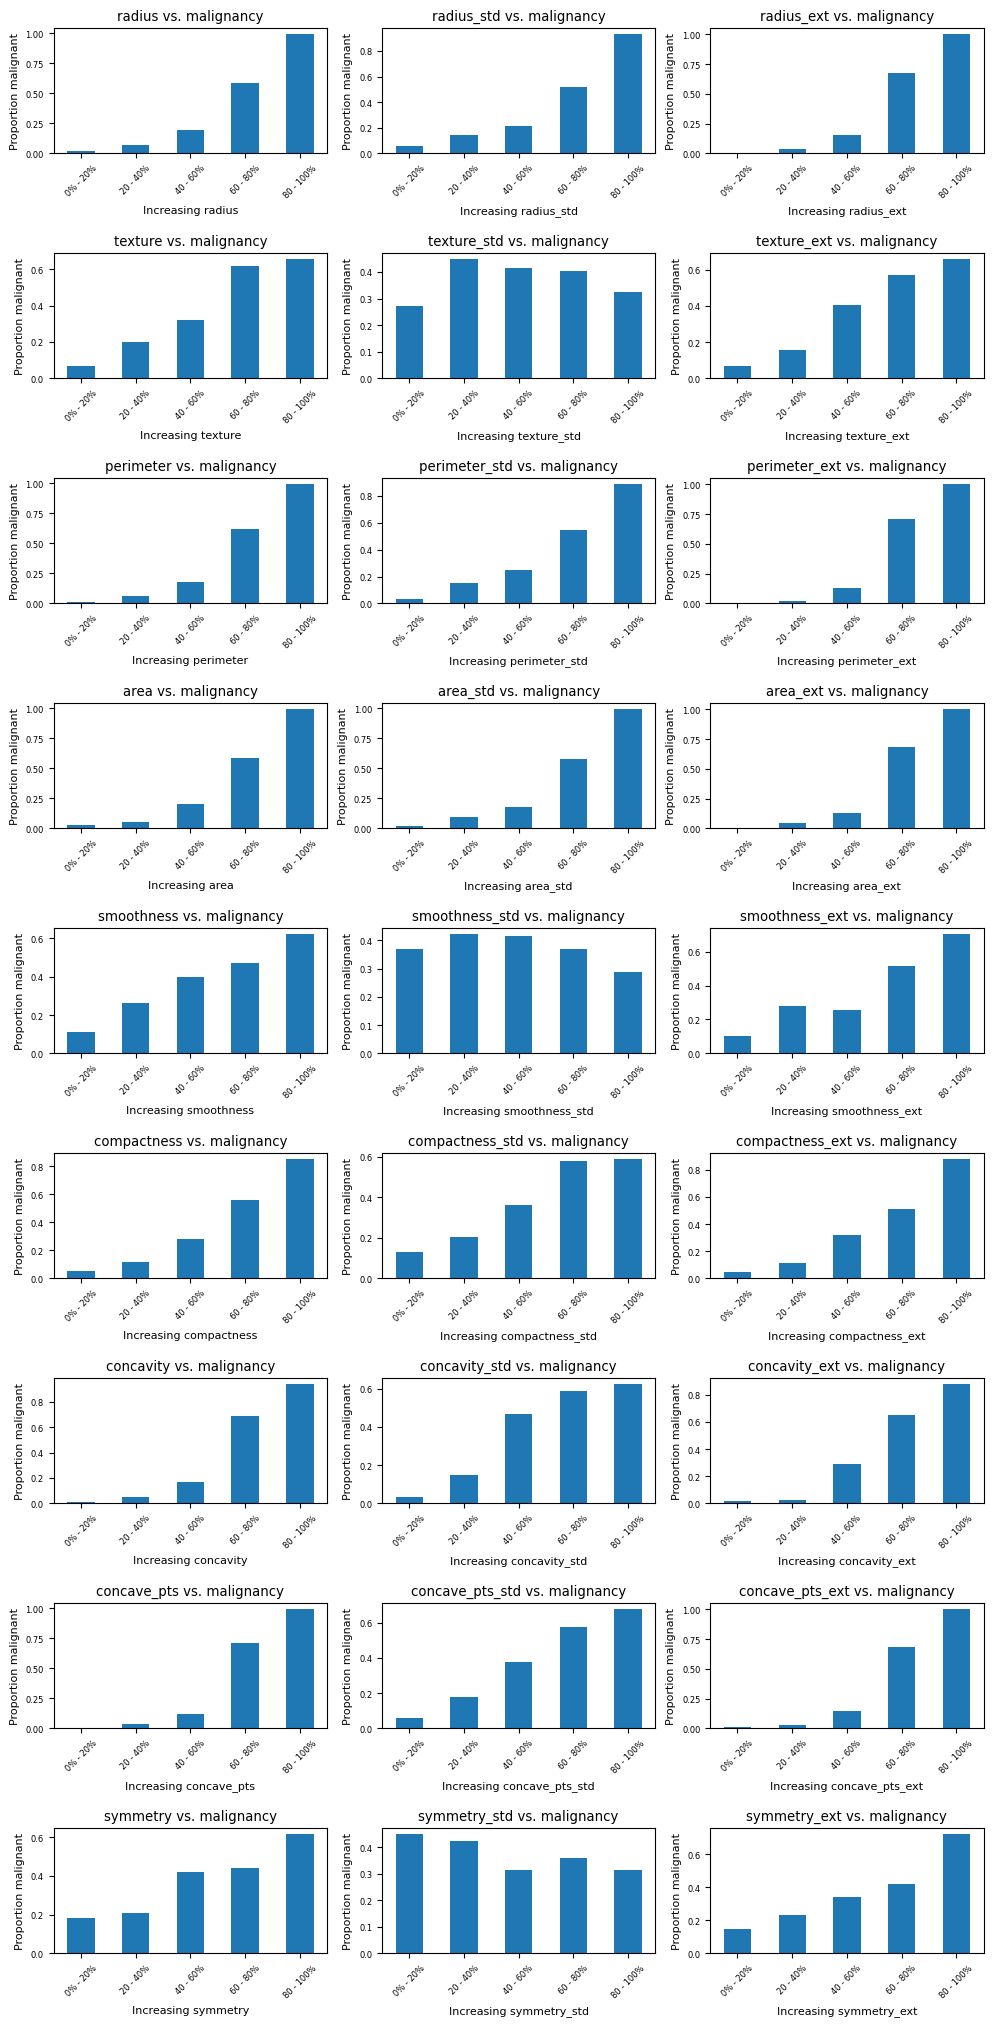

In [26]:
# Quantiling each feature with .qcut - intervals are not equal but we can see how
# measurements are distributed for M (positive) cases
df_m = df.Diagnosis == 'M'

paired_num_fts = []

for i in range(0,9):
    paired_num_fts.append(num_fts[i])
    paired_num_fts.append(num_fts[i + 10])
    paired_num_fts.append(num_fts[i + 20])

fig,axs = plt.subplots(9, 3, figsize = (30,1000))
fig.subplots_adjust(hspace = .8)
plt.rcParams['font.size'] = 8

for ft, ax in zip(paired_num_fts, axs.ravel()):
    qcats = pd.qcut(df[ft], q = [0, .2, .4, .6, .8, 1.],
                    labels = ['0% - 20%','20 - 40%','40 - 60%', '60 - 80%', '80 - 100%'],
                    duplicates = 'drop', precision = 1)
    qbins = np.array(qcats, dtype = object)
    ft_df = pd.DataFrame(list(zip(df_m.values, qbins))).groupby(1).mean()
    ft_df.plot(ax = ax, kind = 'bar', title = ft + ' vs. malignancy', legend = False,
              xlabel = 'Increasing ' + ft, ylabel = 'Proportion malignant', figsize = (12,25),
              rot = 45, fontsize = 6)

In [27]:
# Dropping ID and setting Diagnosis to bool for RF (EDA) and modelling
tts_df = df.drop('ID', axis = 1)
tts_df['Diagnosis'] = tts_df['Diagnosis'].replace(to_replace = {'M': 1, 'B': 0})

# Splitting into train and test sets - will be the same as for modelling
X = tts_df.drop('Diagnosis', axis = 1)
y = tts_df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [28]:
# Random Forest - will look at feature importance, permutation importance (using train and
# validation sets from full train set only)
rf_i = RandomForestClassifier(random_state = 17, n_jobs = -1)
rf1 = rf_i.fit(X_train, y_train)

print(f"Accuracy on train set: {rf1.score(X_train, y_train):.4f}")
print(f"Accuracy on test set: {rf1.score(X_test, y_test):.4f}")

Accuracy on train set: 1.0000
Accuracy on test set: 0.9649


In [29]:
# Display one of the trees
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

estimator = rf1.estimators_[5]

export_graphviz(estimator, out_file = 'tree_fi.dot', rounded = True, proportion = False,
               precision = 2, filled = True)
call(['dot', '-Tpng', 'tree_fi.dot', '-o', 'tree_fi.png', '-Gdpi=600'])
Image(filename = 'tree_fi.png')

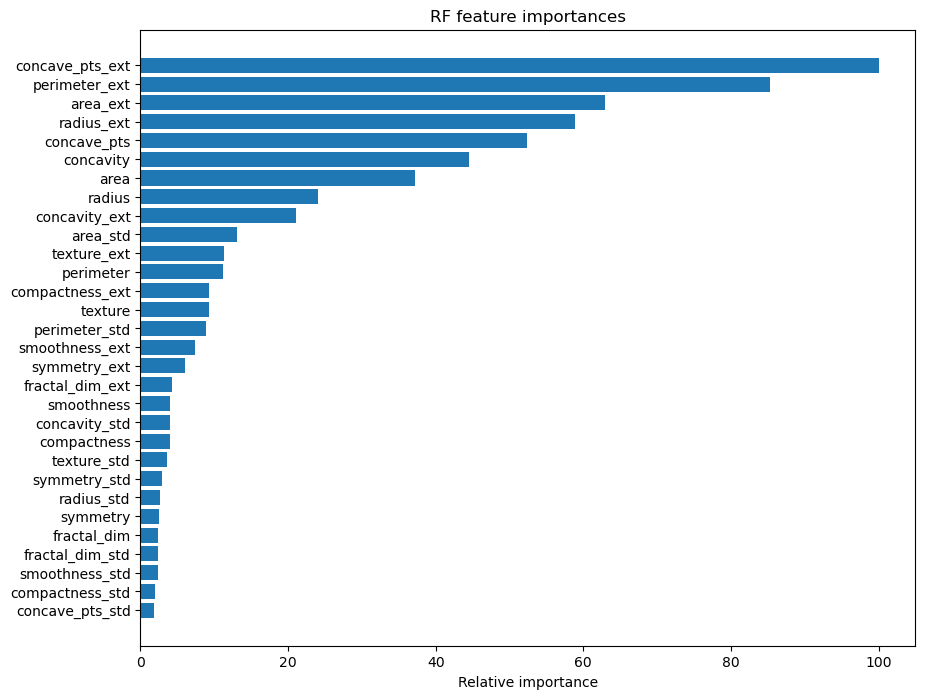

In [30]:
# Bar chart - feature importances
rf1_fi = rf1.feature_importances_
rf1_fi = 100 * (rf1_fi / rf1_fi.max())[:50]
idx = np.argsort(rf1_fi)[:50]

pos = np.arange(idx.shape[0]) + .5
plt.figure(figsize = (10,8))
plt.rcParams['font.size'] = 10
plt.barh(pos, rf1_fi[idx], align = 'center')
plt.yticks(pos, X.columns[idx])
plt.xlabel('Relative importance')
plt.title('RF feature importances')
plt.show();

Based on basic feature importance as calculated on the full training set, it seems that concave_pts_ext, perimeter_ext, concave_pts, radius_ext, area_ext, area, and concavity are strong predictors in RF.

Also running permutation importances - feature importances are based only on gini impurity and are biased toward high-cardinality (many distinct values) features, and also are computed only on the fitted model without validating performance against unseen data. Since the goal is to make a predictive model, I need to see which features are most important for helping the model generalize to unseen data.

The train/validation set used for permutation testing will be pulled from the actual train set and therefore will be a little smaller, but still sufficient - train set will be 64% of the original data and validation set will be 4%. At this point I will still hold out the actual test set so we can fairly assess model performance later on.

In [31]:
X2 = X_train
y2 = y_train

X_trainb, X_testb, y_trainb, y_testb = train_test_split(X2, y2, test_size = .2,
                                                        random_state = 17)
rf2 = rf_i.fit(X_trainb, y_trainb)

print(f"Accuracy on train set: {rf2.score(X_trainb, y_trainb):.4f}")
print(f"Accuracy on test set: {rf2.score(X_testb, y_testb):.4f}")

Accuracy on train set: 1.0000
Accuracy on test set: 0.9341


Lower accuracy is expected - less training data provided.

In [32]:
# Also checking recall and f1 scores
rf2_pred = rf2.predict(X_testb)
rf2_predproba = rf2.predict_proba(X_testb)[:,1]

rf2_r = recall_score(y_testb, rf2_pred)
rf2_f = f1_score(y_testb, rf2_pred, average = 'weighted')

rf2_cm = confusion_matrix(y_testb, rf2_pred)

print('\n Test recall:', round(rf2_r, 3), '\n Test f1:', round(rf2_f, 3))


 Test recall: 0.861 
 Test f1: 0.933


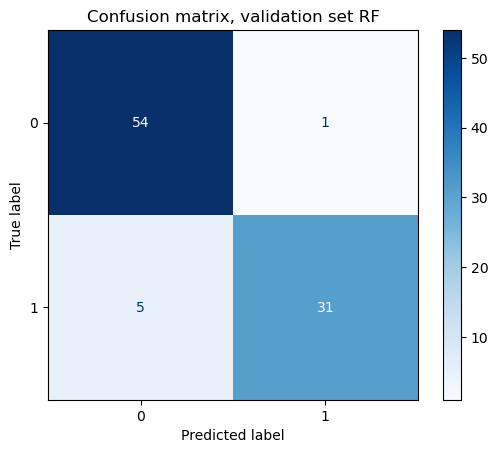

In [33]:
# Display confusion matrix
rf2_cm_disp = ConfusionMatrixDisplay(confusion_matrix = rf2_cm, display_labels = rf2.classes_)
rf2_cm_disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion matrix, validation set RF')
plt.show()

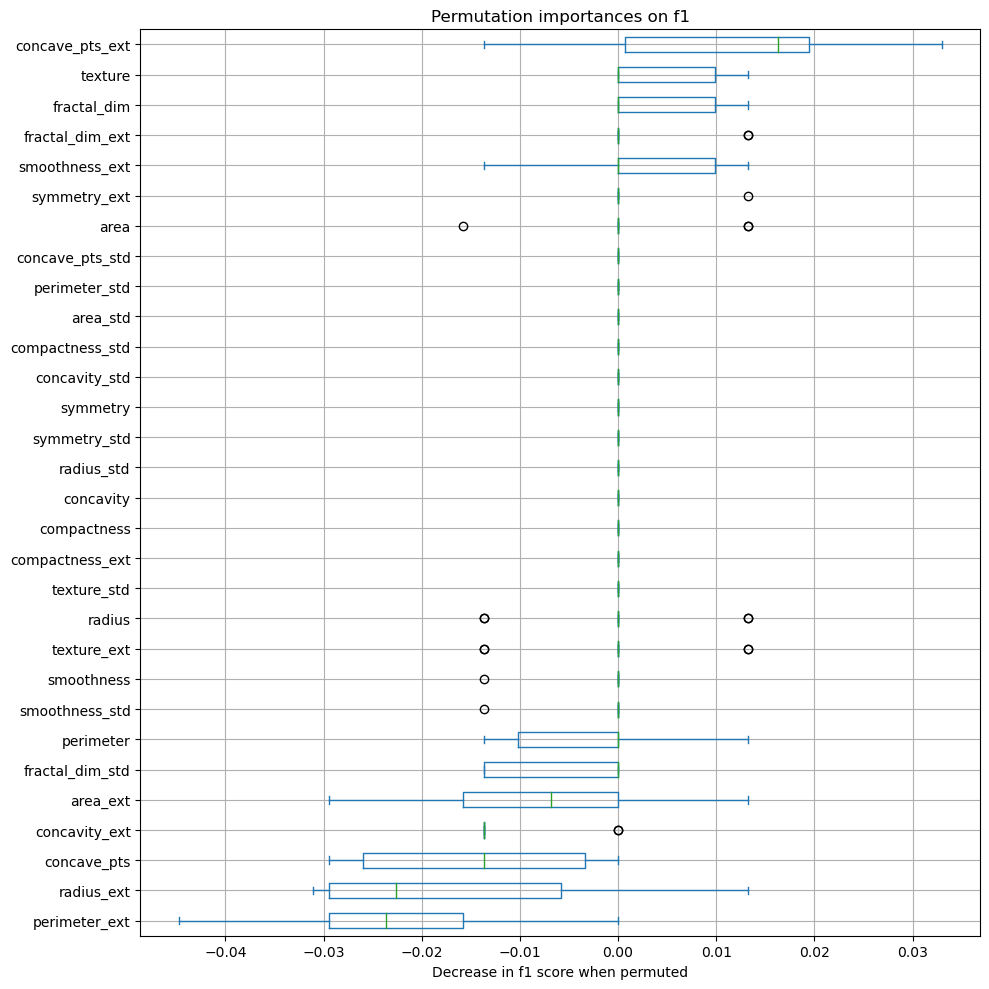

In [34]:
# Permutation importance to see if it confirms anything we saw in feature importance
# First running with f1 as scoring
result = permutation_importance(rf2, X_testb, y_testb, scoring = 'f1', n_repeats = 10, random_state = 17,
                               n_jobs = 2)

imp_sort_idx = result.importances_mean.argsort()

importances = pd.DataFrame(result.importances[imp_sort_idx].T, columns = X2.columns[imp_sort_idx])

# Boxplot
ax = importances.plot.box(vert = False, whis = 10, figsize = (10,10), grid = True)
ax.set_title("Permutation importances on f1")
ax.set_xlabel("Decrease in f1 score when permuted")
ax.figure.tight_layout()

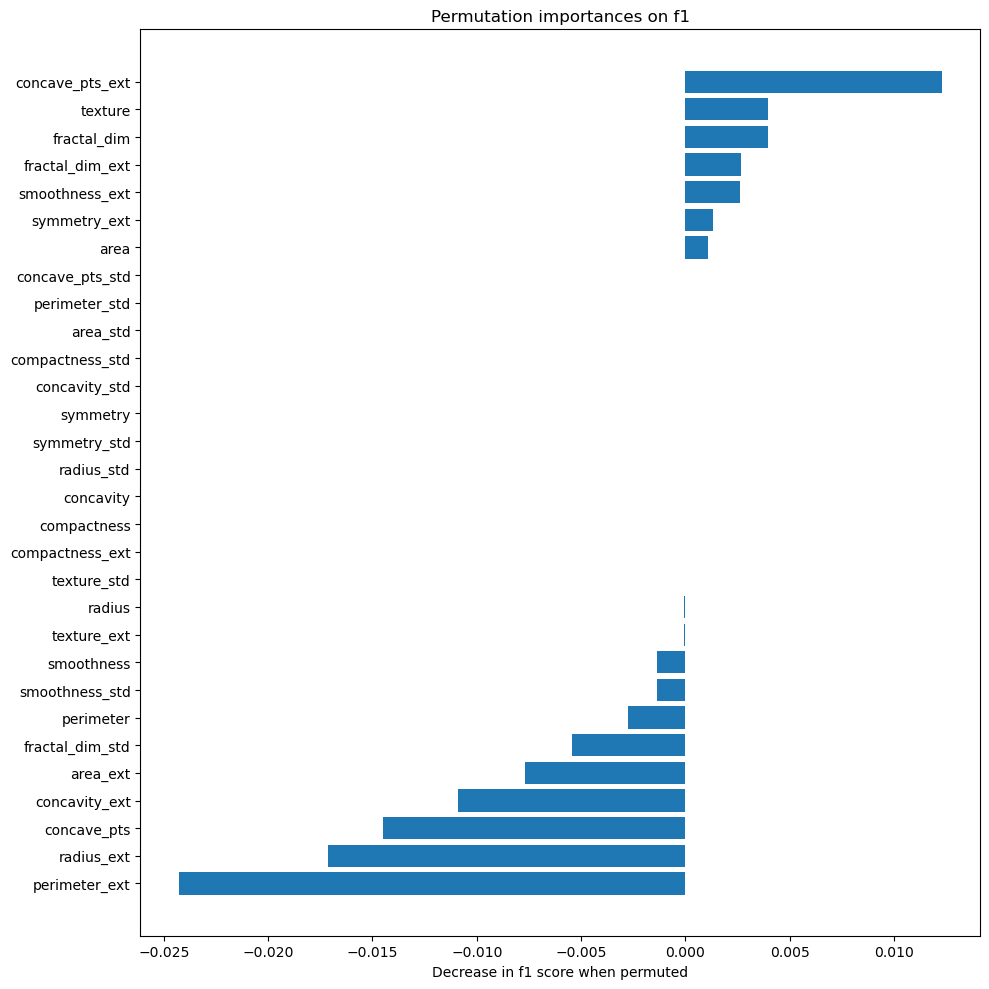

In [35]:
# Bar chart
fig,ax = plt.subplots(figsize = (10, 10))
plt.rcParams['font.size'] = 10

ax.barh(X_testb.columns[imp_sort_idx], result.importances[imp_sort_idx].mean(axis = 1))
ax.set_title('Permutation importances on f1')
ax.set_xlabel("Decrease in f1 score when permuted")
fig.tight_layout()

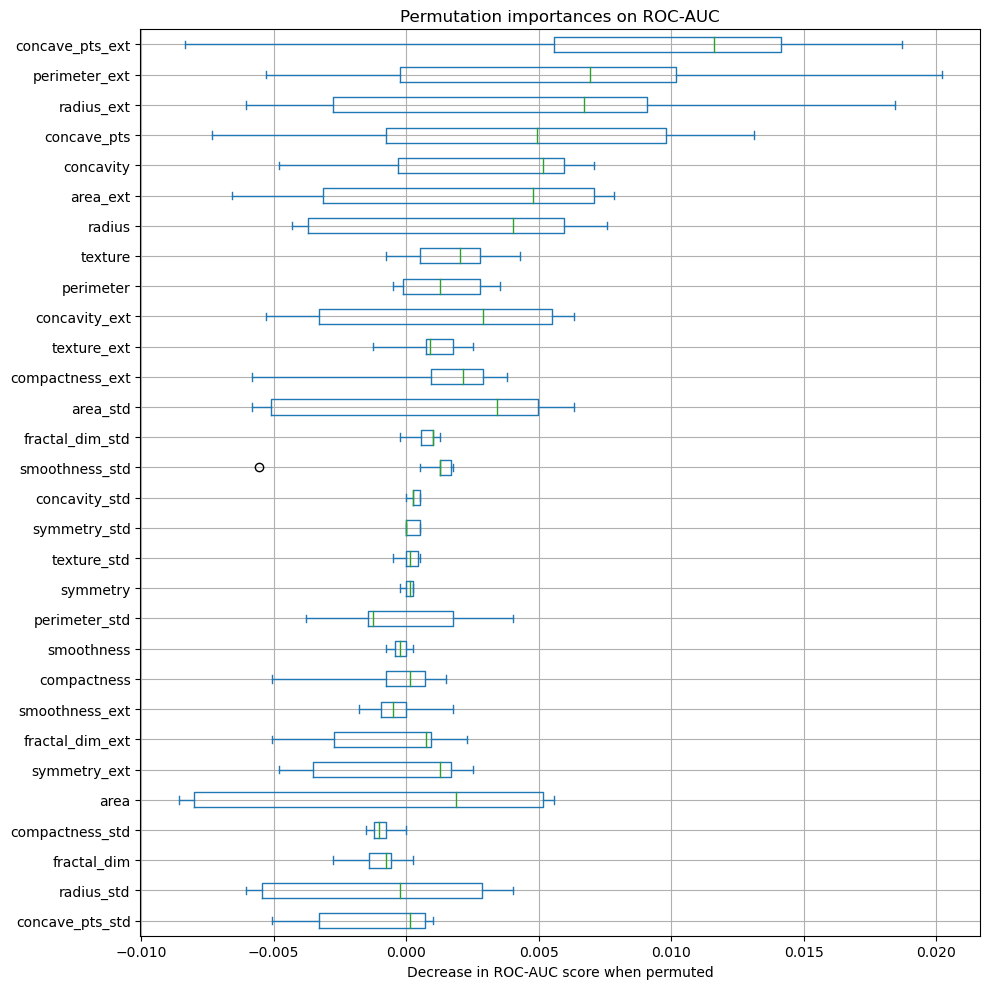

In [36]:
# Now running with using roc_auc as scoring
result = permutation_importance(rf2, X_testb, y_testb, scoring = 'roc_auc', n_repeats = 10, random_state = 17,
                               n_jobs = 2)

imp_sort_idx = result.importances_mean.argsort()

importances = pd.DataFrame(result.importances[imp_sort_idx].T, columns = X2.columns[imp_sort_idx])

# Boxplot
ax = importances.plot.box(vert = False, whis = 10, figsize = (10,10), grid = True)
ax.set_title("Permutation importances on ROC-AUC")
ax.set_xlabel("Decrease in ROC-AUC score when permuted")
ax.figure.tight_layout()

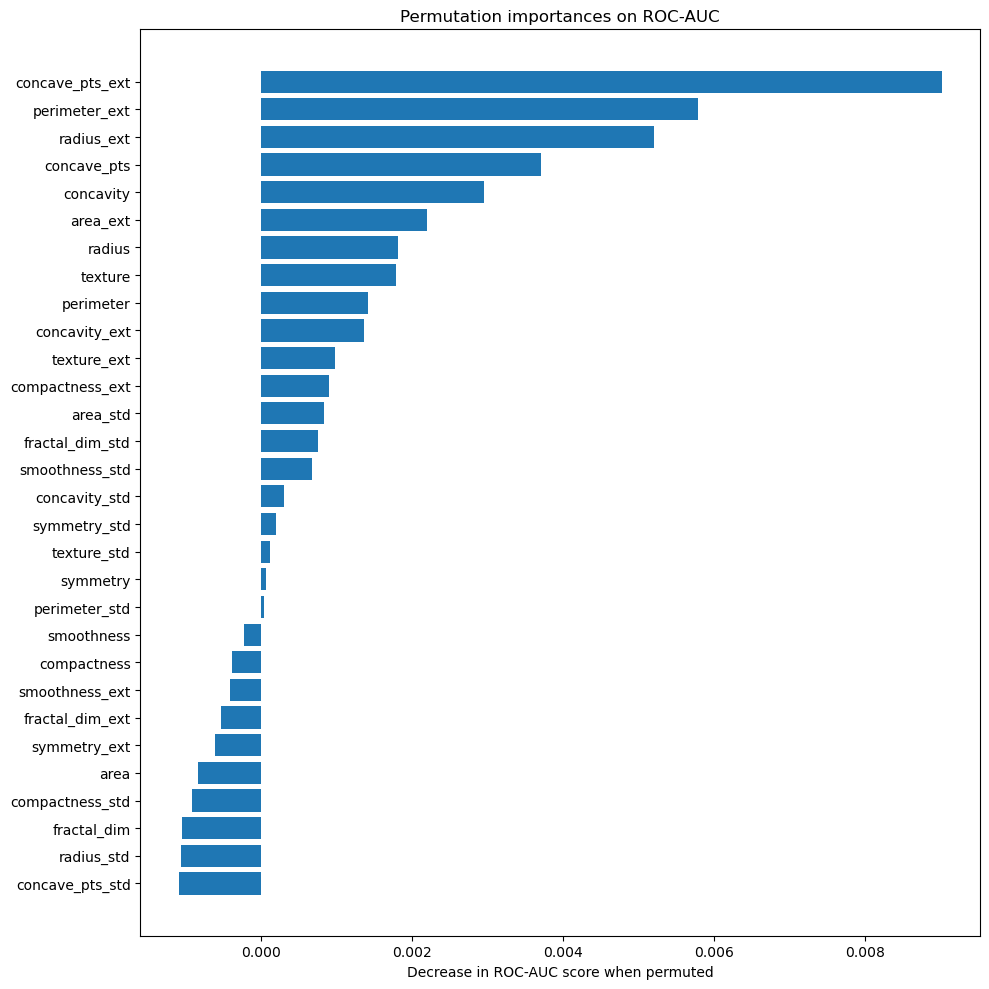

In [37]:
# Bar chart
fig,ax = plt.subplots(figsize = (10, 10))
plt.rcParams['font.size'] = 10

ax.barh(X_testb.columns[imp_sort_idx], result.importances[imp_sort_idx].mean(axis = 1))
ax.set_title('Permutation importances on ROC-AUC')
ax.set_xlabel("Decrease in ROC-AUC score when permuted")
fig.tight_layout()

Based on permutation testing, it seems that concave_pts_ext, texture, fractal_dim, fractal_dim_ext, smoothness_ext, symmetry_ext, and area are strong predictors.

concave_pts_ext, perimeter_ext, radius_ext, concave_pts, concavity, area_ext, radius, texture, perimeter, concavity_ext

So concave_pts_ext, perimeter_ext, radius_ext, concavity, radius, concavity_ext, and area are the predictors that are common in both feature and permutation importance with this split (both scoring methods).